In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
from scipy.signal import firwin, freqz, lfilter, butter,filtfilt,hilbert
from glob import glob
from scipy.io import wavfile
import os
import soundfile as sf
import librosa 
import librosa.display
import IPython.display as ipd

In [106]:

# Ses dosyalarının bulunduğu klasörün yolu
folder_path = 'C:\\Users\\hghar\\OneDrive\\Masaüstü\\dsp_proje'
# Klasördeki tüm dosyaları alın
file_list = os.listdir(folder_path)

# .wav dosyalarını seçin ve işleyin
for file_name in file_list:
    if file_name.endswith('.wav'):
        file_path = os.path.join(folder_path, file_name)
        sampling_rate, audio_data = wavfile.read(file_path)
        
        # İşlemleri gerçekleştirin
        # Örneğin, ses dosyasını görselleştirebilir veya DSP işlemlerini uygulayabilirsiniz

In [107]:
file_names = ['scania_rs420.wav', 'Mercedes_Benz_Euro_5_Motor.wav', 'Mercedes_Benz_6cylinders_euro4.wav', 'mercedes_benz_v6.wav', 'scania_g400.wav', 'scania_540s.wav', 'bmc_fatih.wav', 'scan.wav', 'scania_r420v2.wav']

# Ses verilerini tutacak liste
audio_data_list = []
sampling_rate_list = []

# Ses dosyalarını işleyin
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Ses dosyasını yükleyin ve örnekleme hızıyla birlikte alın
    sampling_rate, audio_data_stereo = wavfile.read(file_path)
    
    # Sol kanalı seçin (channel 1)
    audio_data_mono = audio_data_stereo[:, 0]  # İlk sütunü kullanarak tek boyutlu veriyi elde edin
    
    
    # Ses verilerini normalize edin
    normalized_audio_data = audio_data_mono / np.iinfo(audio_data_mono.dtype).max
    
    # Ses verilerini listeye ekleyin
    audio_data_list.append(normalized_audio_data)
    sampling_rate_list.append(sampling_rate)

# Daha kısa olan ses kaydının uzunluğunu belirleyin
min_length = min(len(audio_data) for audio_data in audio_data_list)

# Tüm ses kayıtlarını aynı uzunluğa kısaltın
audio_data_list = [audio_data[:min_length] for audio_data in audio_data_list]

# İstenilen şekilde tek boyutlu ses verilerini kullanabilirsiniz
x1 = audio_data_list[0]
x2 = audio_data_list[1]
x3 = audio_data_list[2]
x4 = audio_data_list[3]
x5 = audio_data_list[4]
x6 = audio_data_list[5]
x7 = audio_data_list[6]
x8 = audio_data_list[7]
x9 = audio_data_list[8]


sr1 = sampling_rate_list[0]
sr2 = sampling_rate_list[1]
sr3 = sampling_rate_list[2]
sr4 = sampling_rate_list[3]
sr5 = sampling_rate_list[4]
sr6 = sampling_rate_list[5]
sr7 = sampling_rate_list[6]
sr8 = sampling_rate_list[7]
sr9 = sampling_rate_list[8]


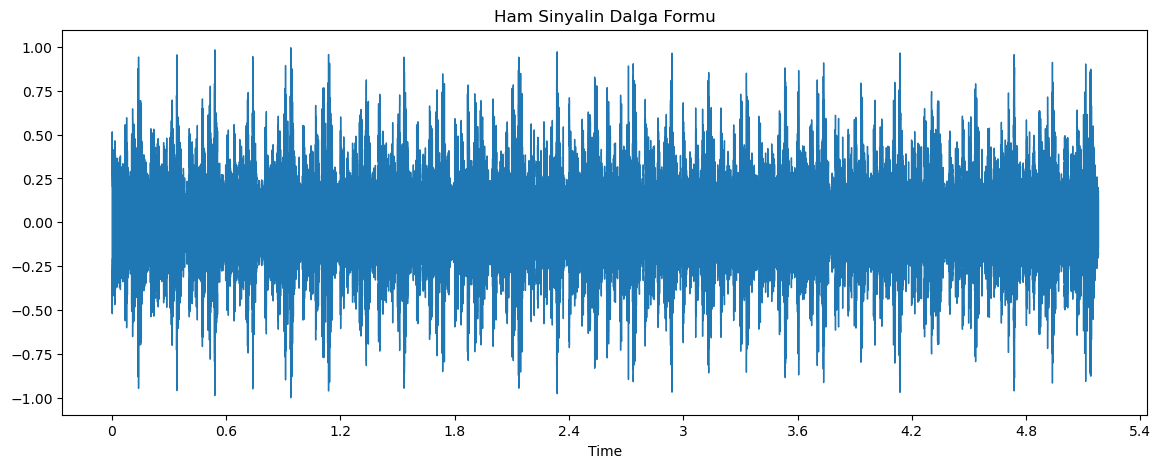

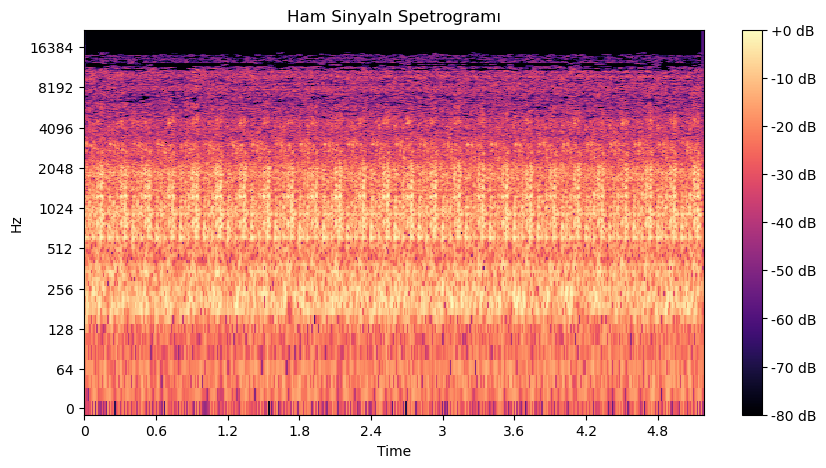

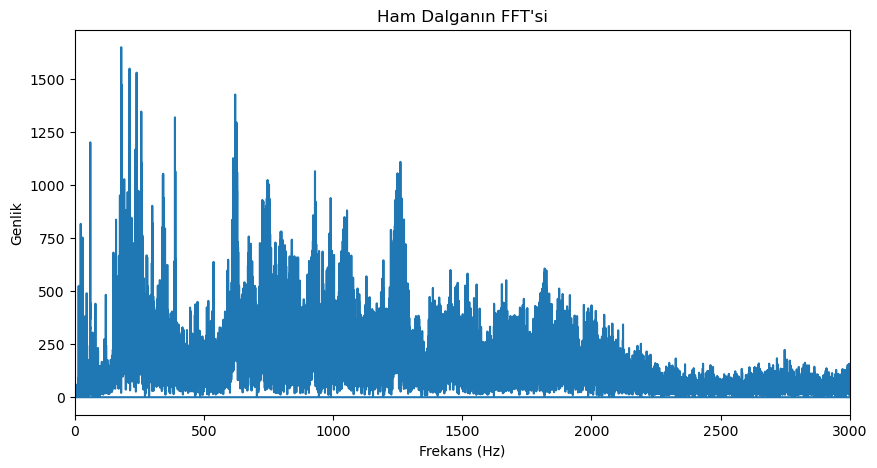

(20, 447)


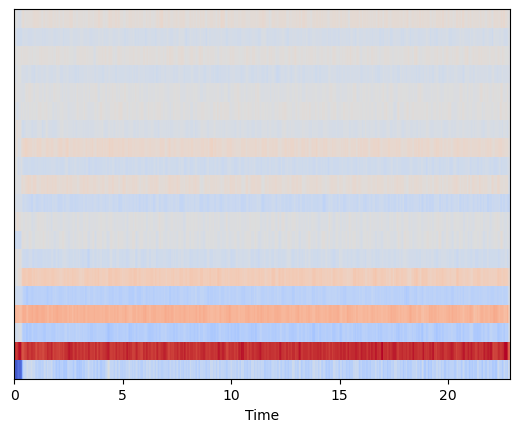

In [110]:

# SCANIA RS420

# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x1, sr=sr1)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(x1)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr1, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()


xw2 = fft(x1) 
f = np.fft.fftfreq(len(x1), 1/sr1)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0, 3000])
plt.show()

# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')



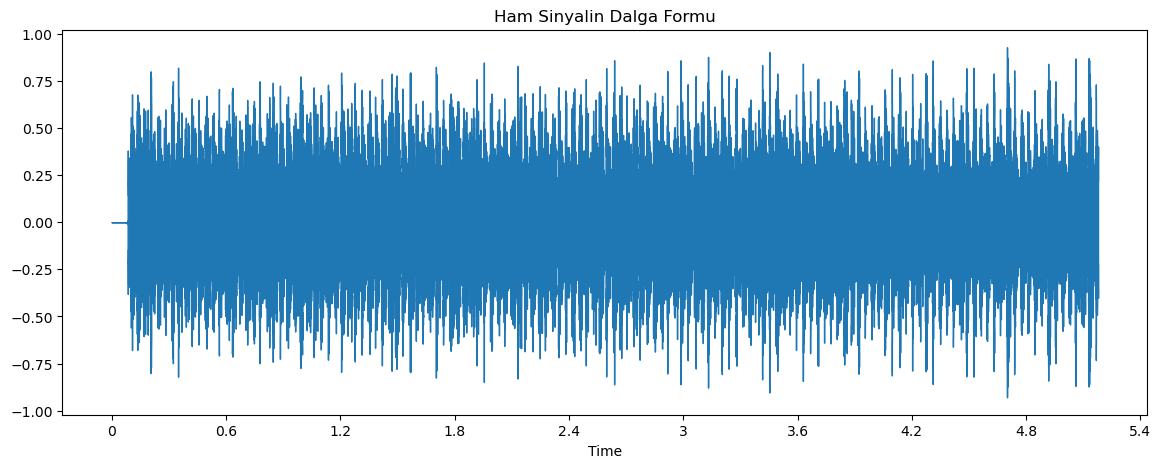

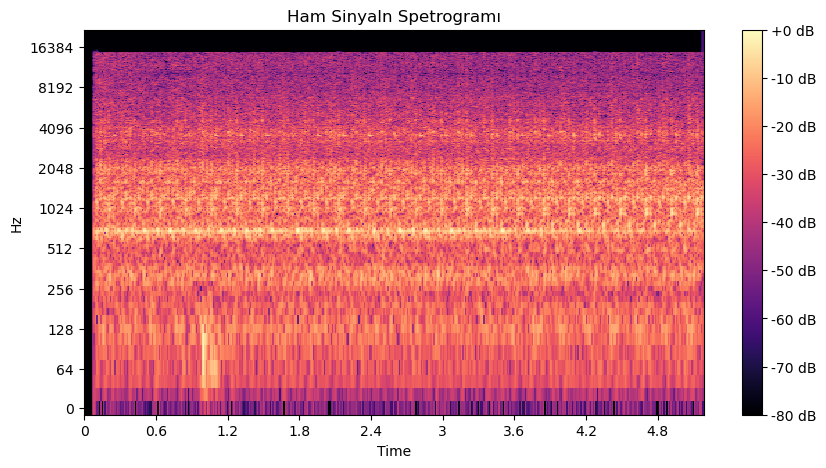

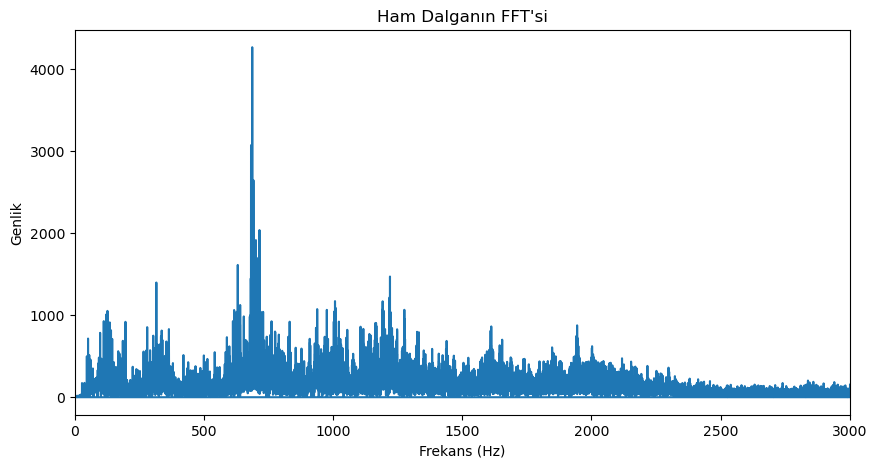

(20, 447)


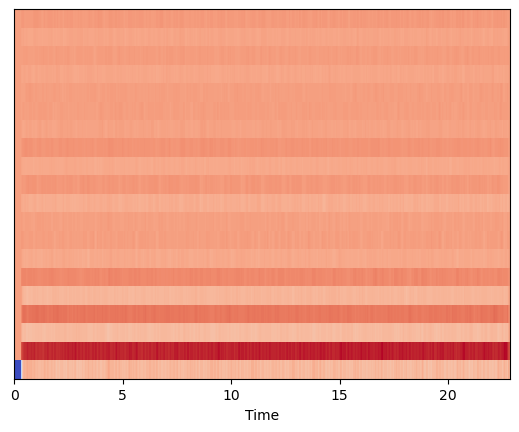

In [111]:

# MERCEDES BENZ EURO 5 MOTOR


# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x2, sr=sr2)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(x2)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr2, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()


xw2 = fft(x2) 
f = np.fft.fftfreq(len(x2), 1/sr2)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0, 3000])
plt.show()

# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=x2, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')



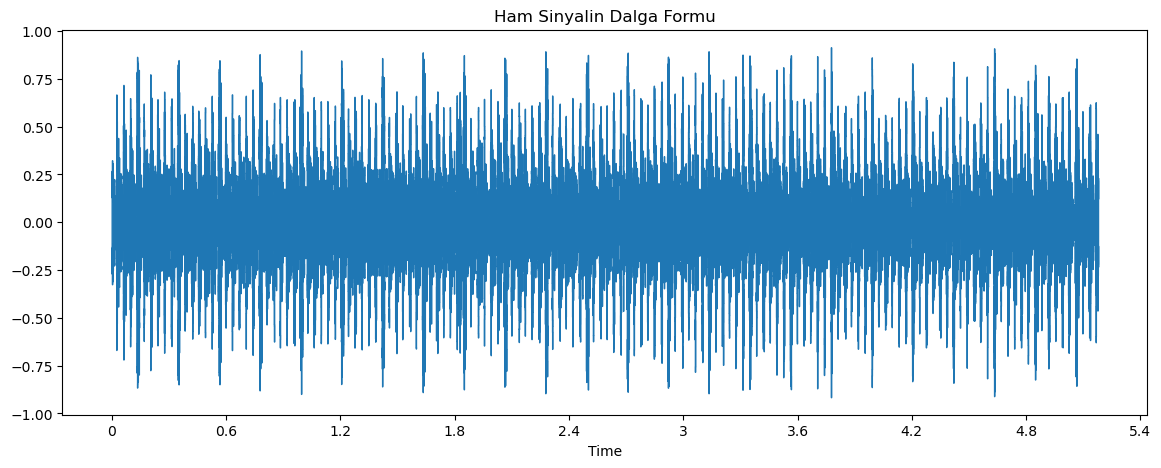

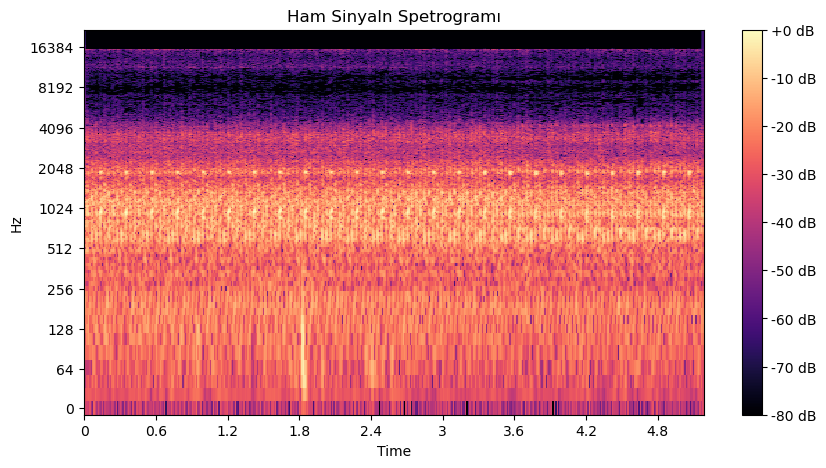

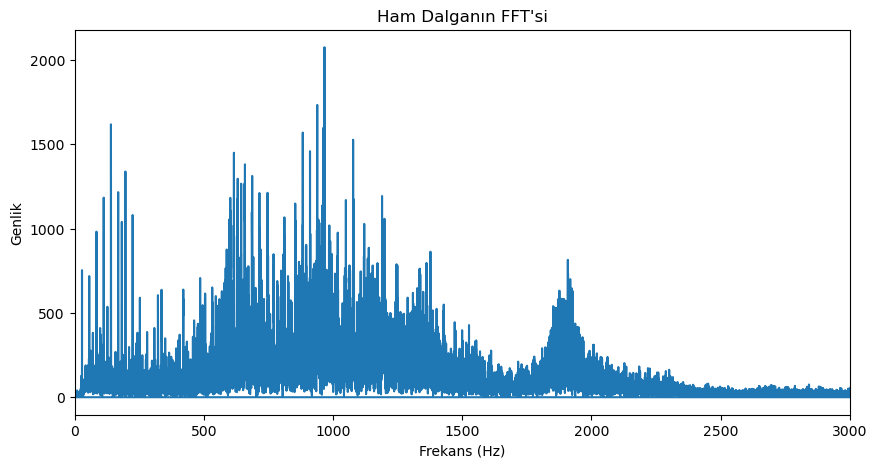

(20, 447)


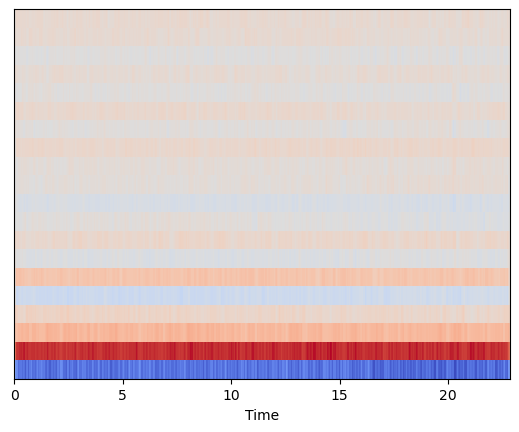

In [112]:

# MERCEDES BENZ 6 CYLINDERS EURO 4


# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x3, sr=sr3)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(x3)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr1, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()


xw2 = fft(x3) 
f = np.fft.fftfreq(len(x3), 1/sr3)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0, 3000])
plt.show()

# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=x3, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')



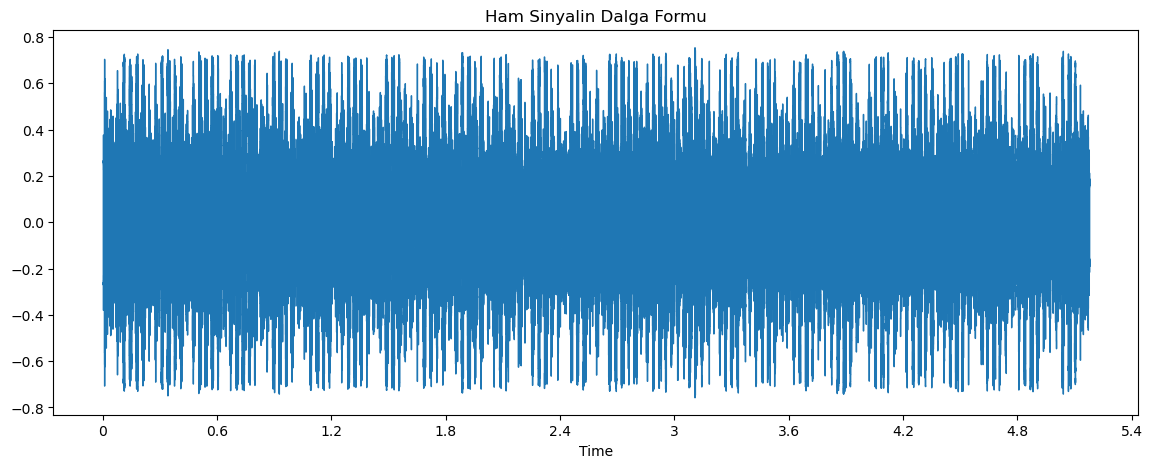

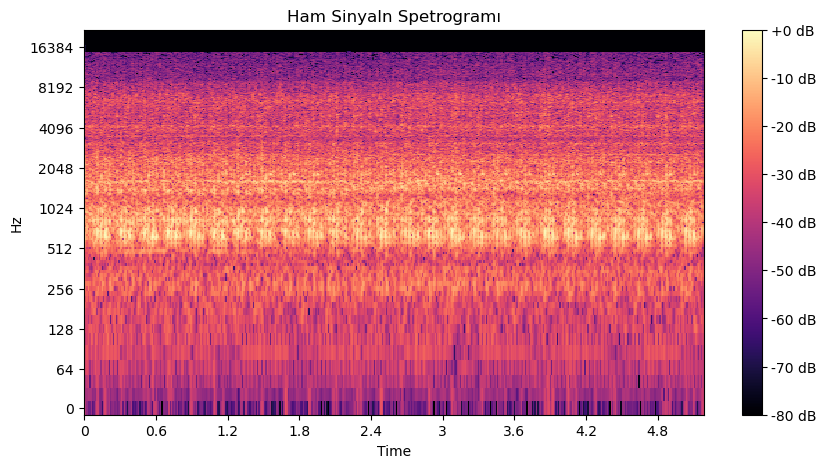

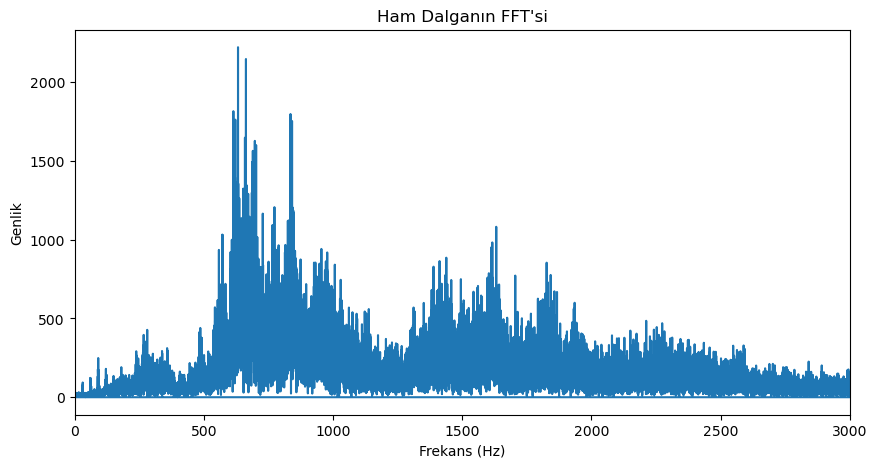

(20, 447)


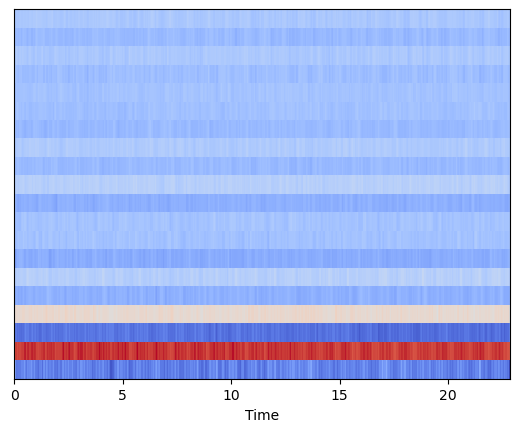

In [113]:

# MERCEDES BENZ 6 CYLINDERS EURO 4

# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x4, sr=sr4)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(x4)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr1, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()

xw2 = fft(x4) 
f = np.fft.fftfreq(len(x4), 1/sr4)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0, 3000])
plt.show()



# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=x4, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')



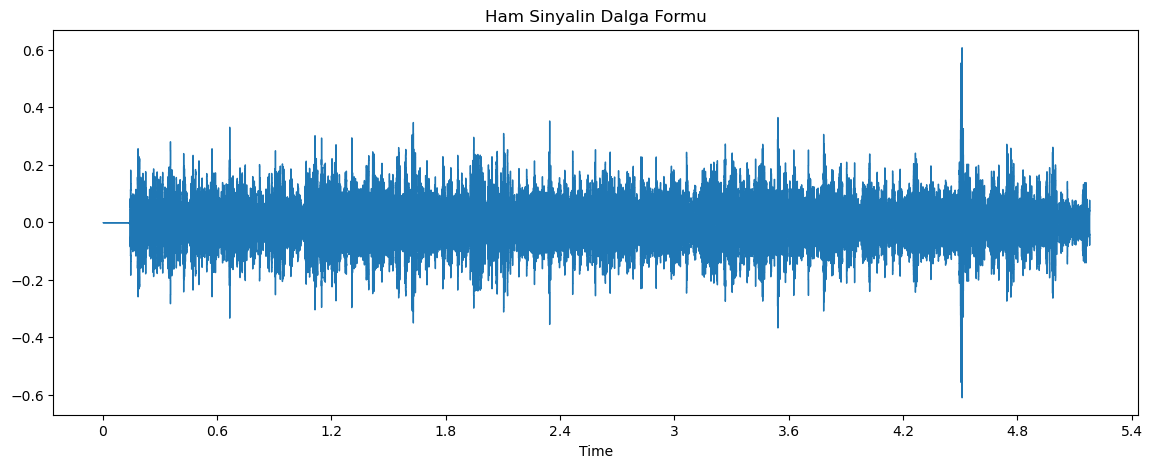

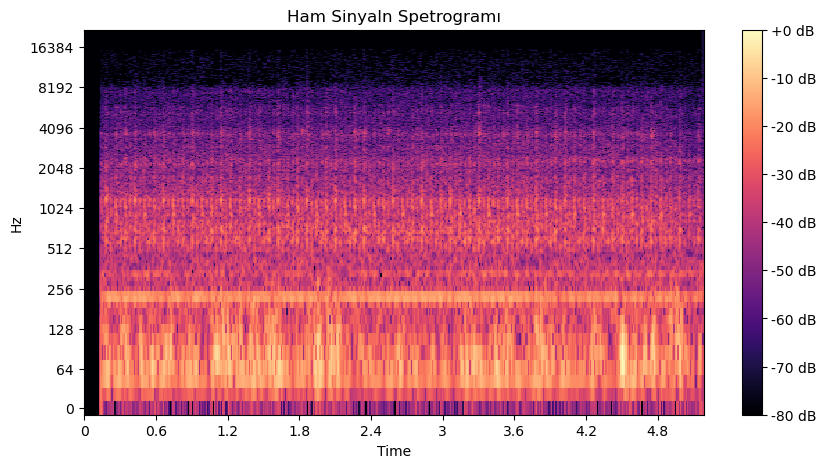

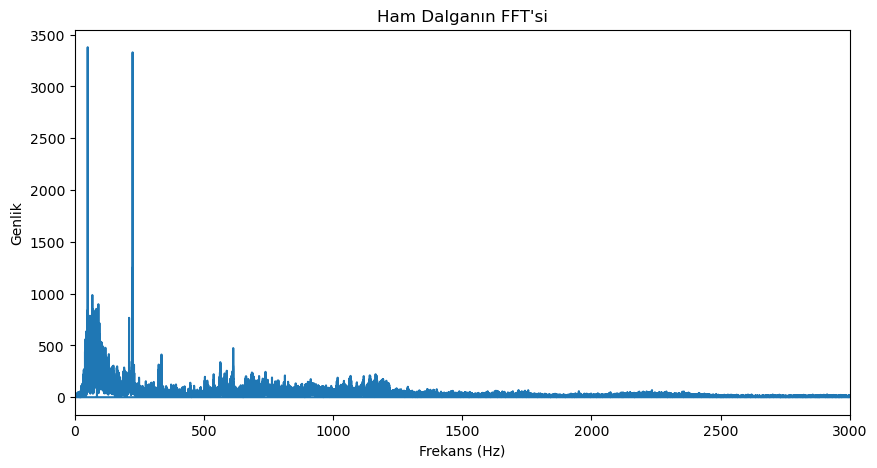

(20, 447)


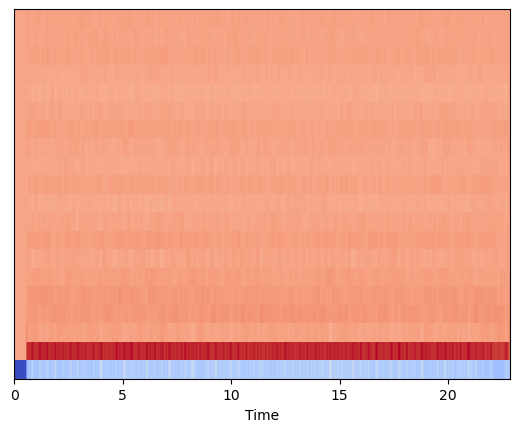

In [114]:

# SCANIA G400

# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x5, sr=sr4)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(x5)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr5, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()

xw2 = fft(x5) 
f = np.fft.fftfreq(len(x5), 1/sr4)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0, 3000])
plt.show()



# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=x5, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')



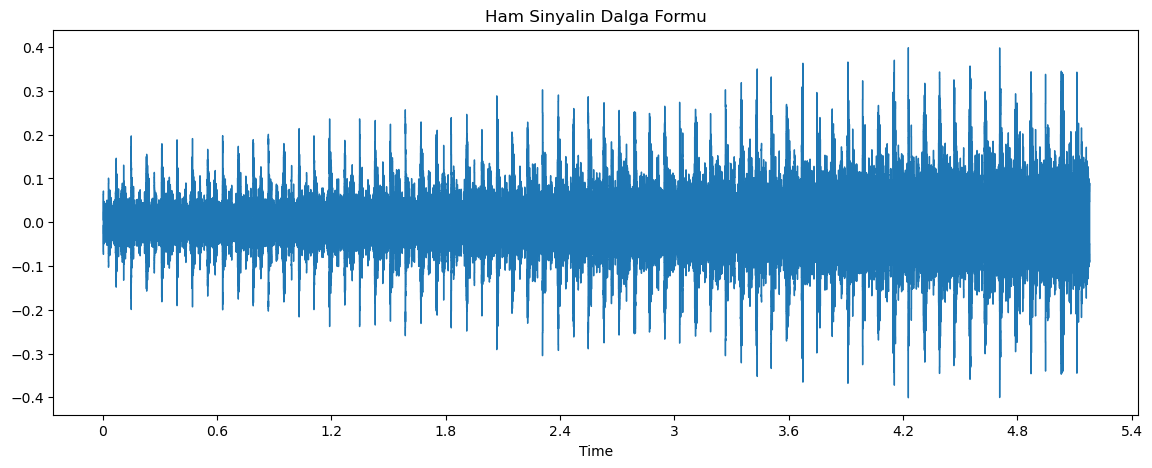

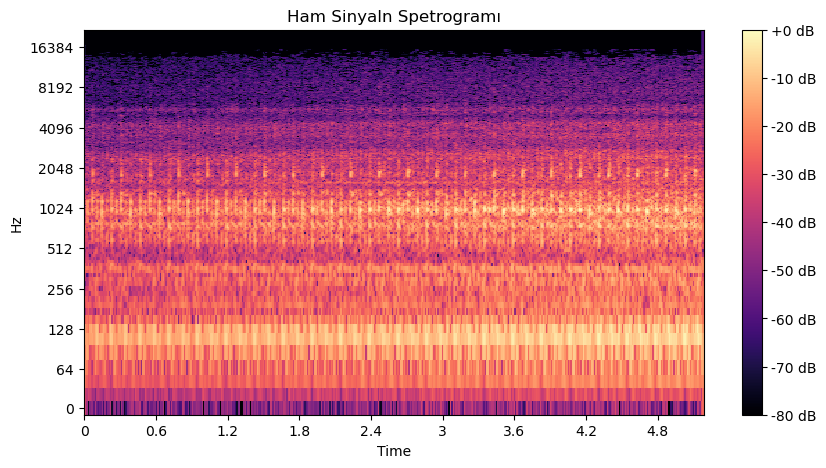

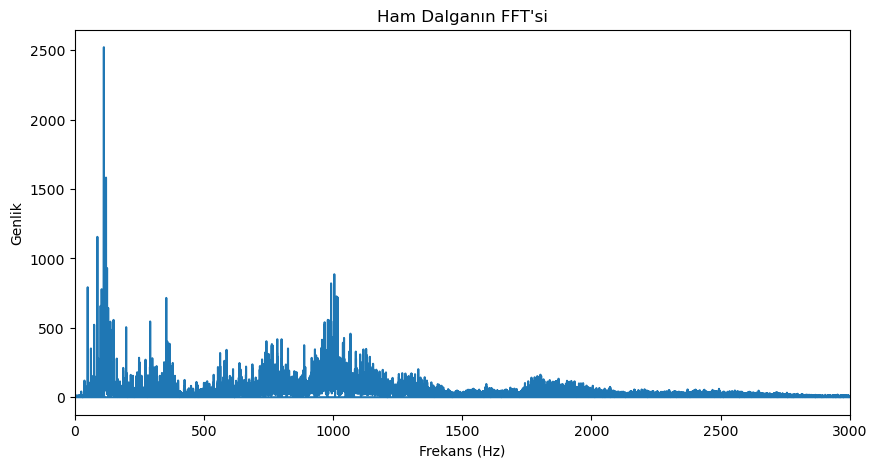

(20, 447)


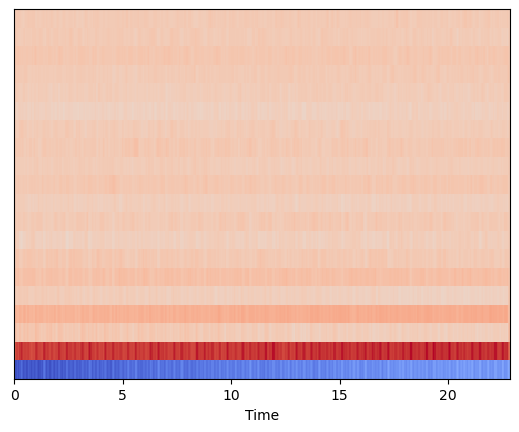

In [115]:

# SCANIA 540S

# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x6, sr=sr6)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(x6)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr5, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()

xw2 = fft(x6) 
f = np.fft.fftfreq(len(x6), 1/sr4)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0, 3000])
plt.show()



# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=x6, sr=sr)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')



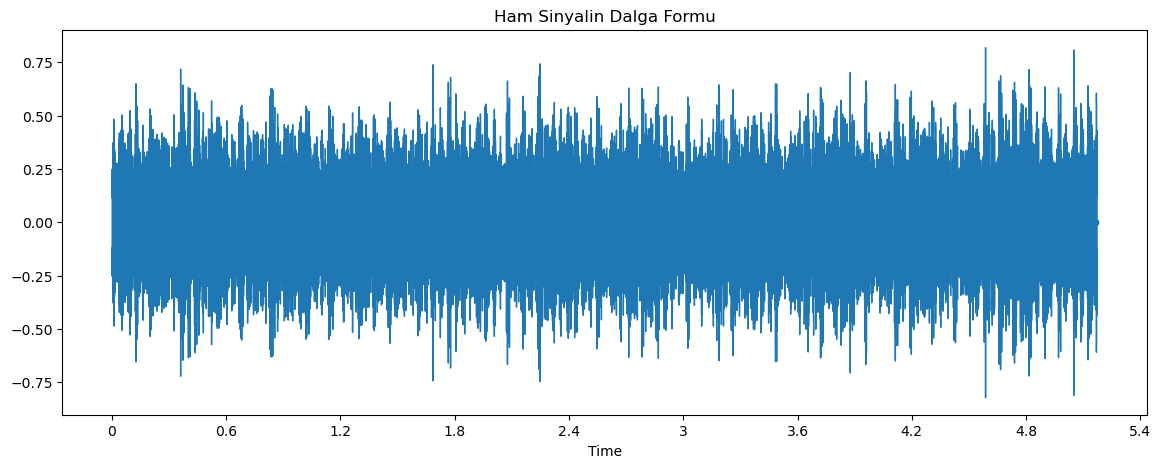

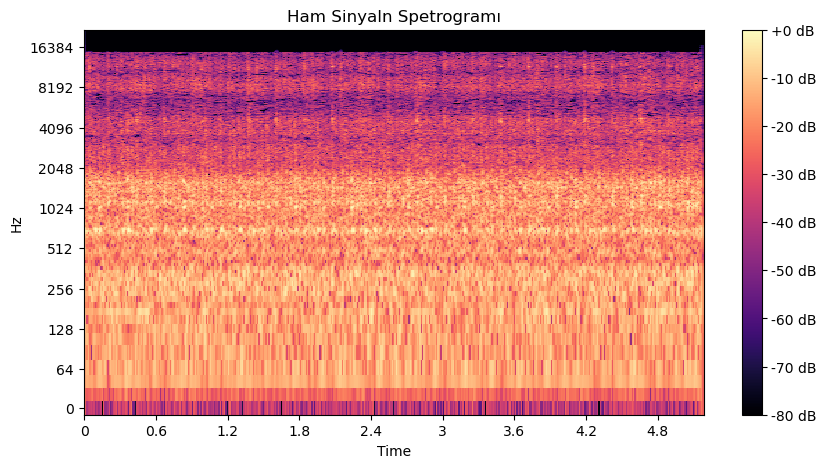

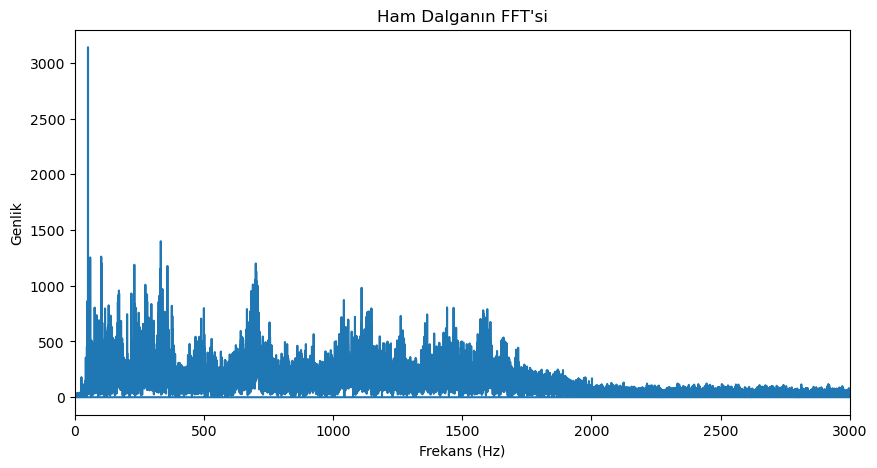

(20, 447)


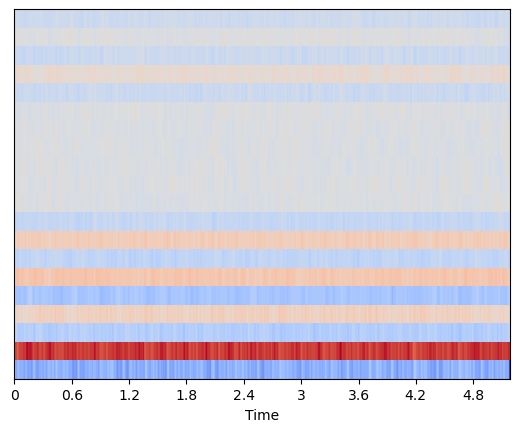

In [116]:

# BMC FATIH

# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x7, sr=sr7)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(x7)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr7, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()

xw2 = fft(x7) 
f = np.fft.fftfreq(len(x7), 1/sr4)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0, 3000])
plt.show()



# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=x7, sr=sr7)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr7, x_axis='time')



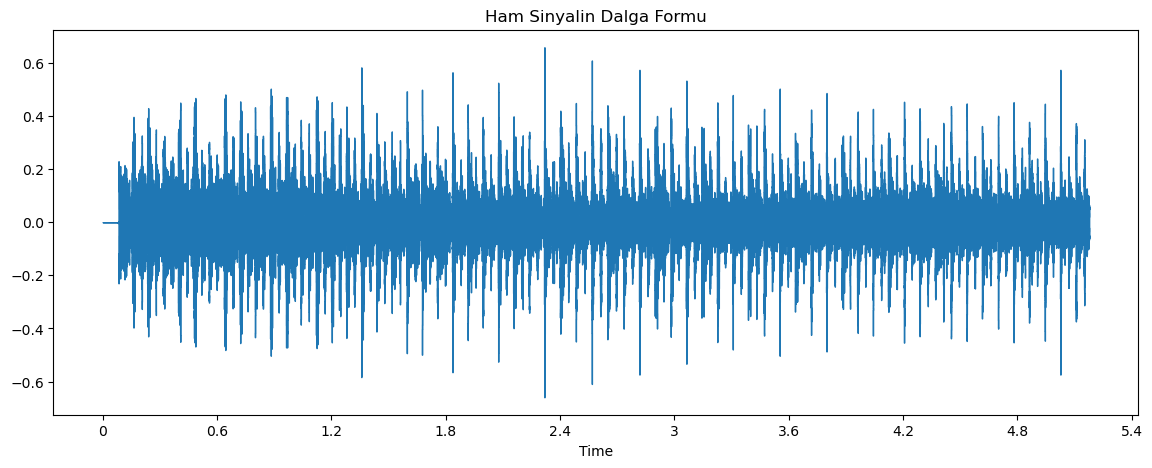

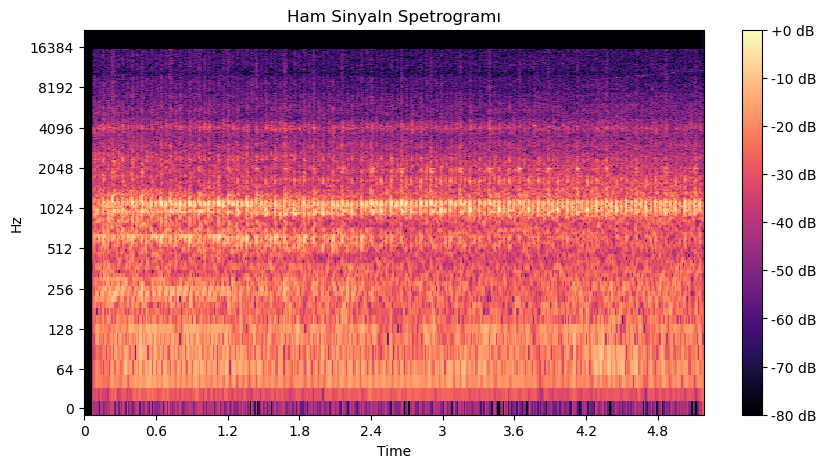

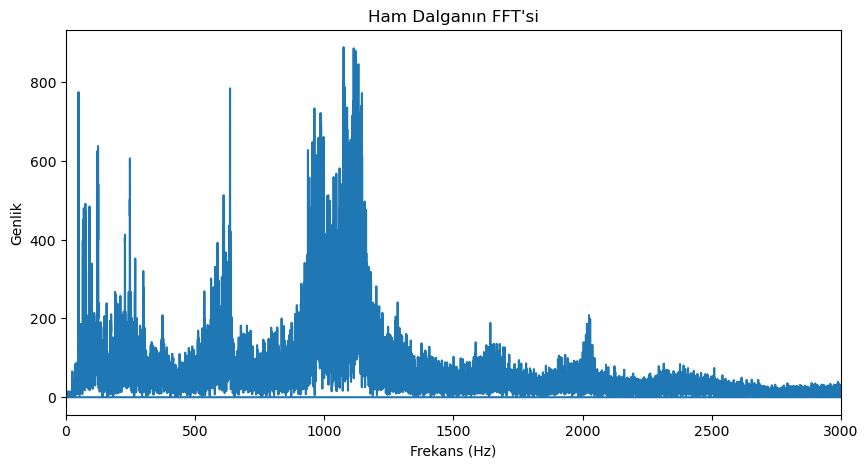

(20, 447)


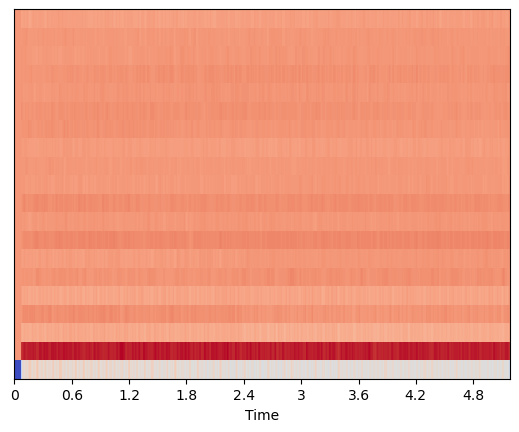

In [117]:

# SCANIA 
# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x8, sr=sr8)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(x8)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr8, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()

xw2 = fft(x8) 
f = np.fft.fftfreq(len(x8), 1/sr8)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0,3000])
plt.show()



# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=x8, sr=sr8)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr8, x_axis='time')



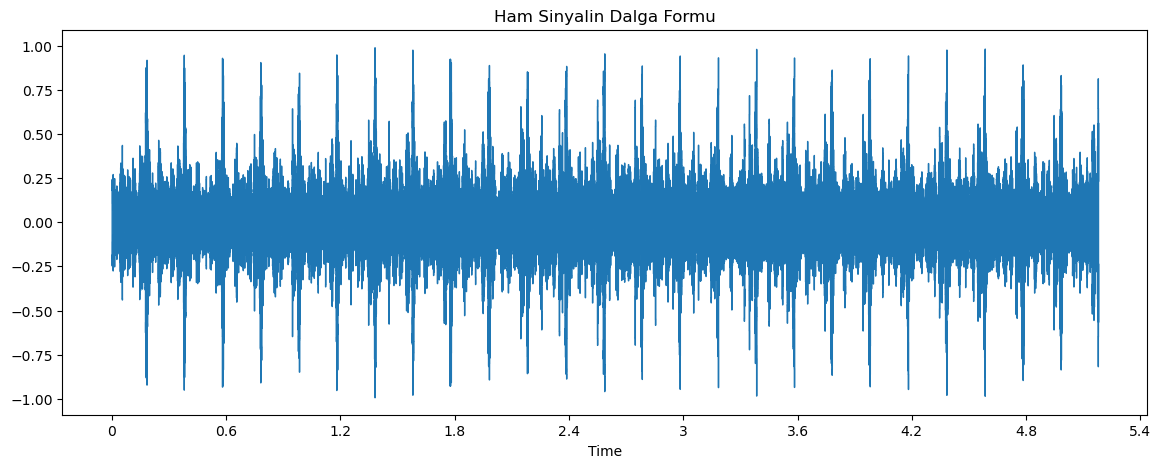

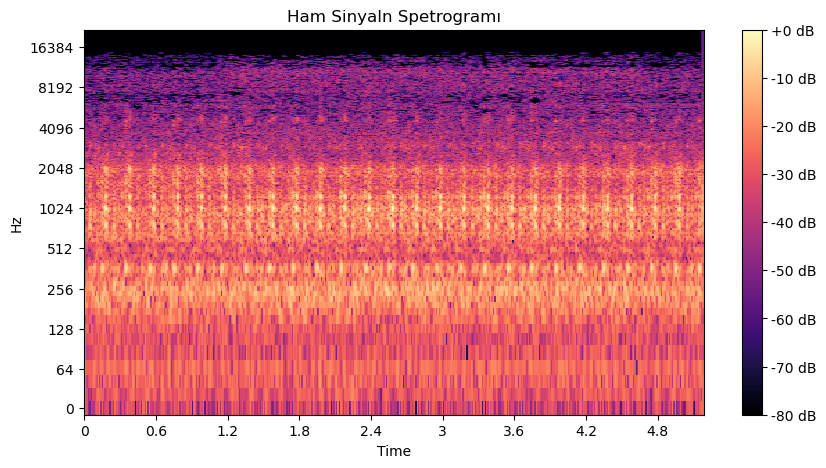

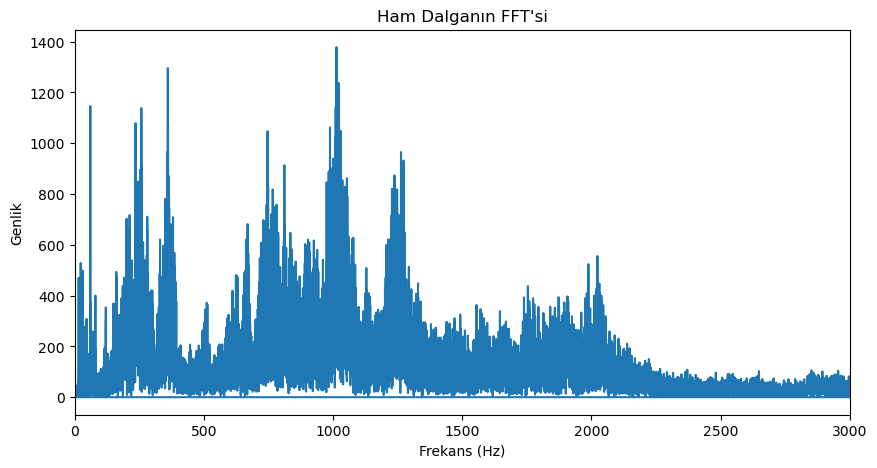

(20, 447)


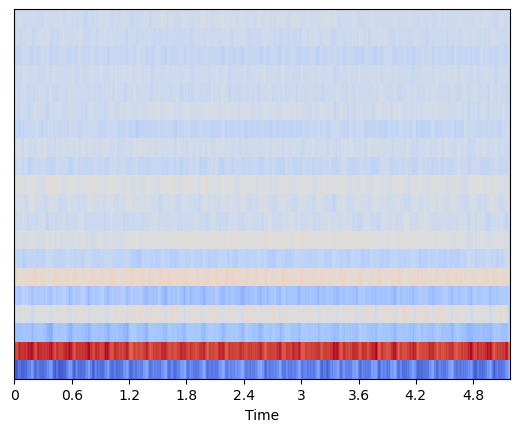

In [118]:

# scabia_r420v2

# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x9, sr=sr9)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(x9)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr9, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()

xw2 = fft(x9) 
f = np.fft.fftfreq(len(x9), 1/sr8)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0,3000])
plt.show()



# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=x9, sr=sr8)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr8, x_axis='time')



228352 228352
228352 228352
44100 44100


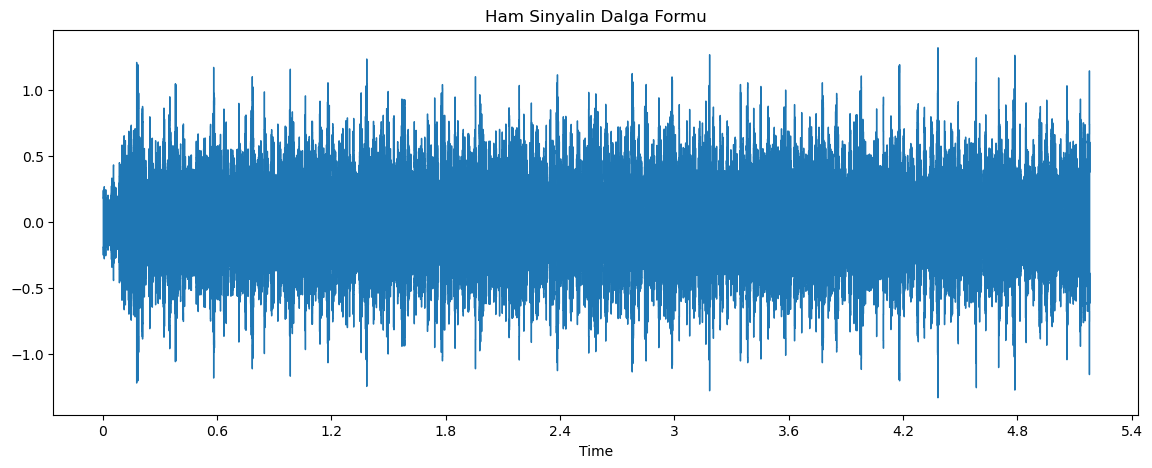

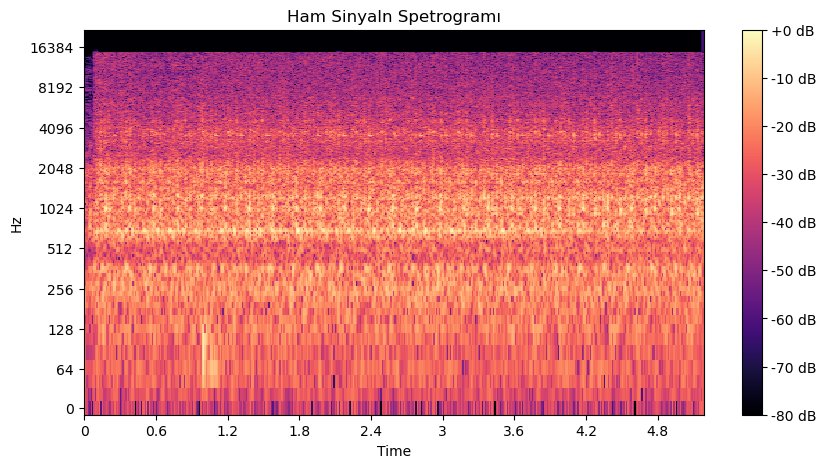

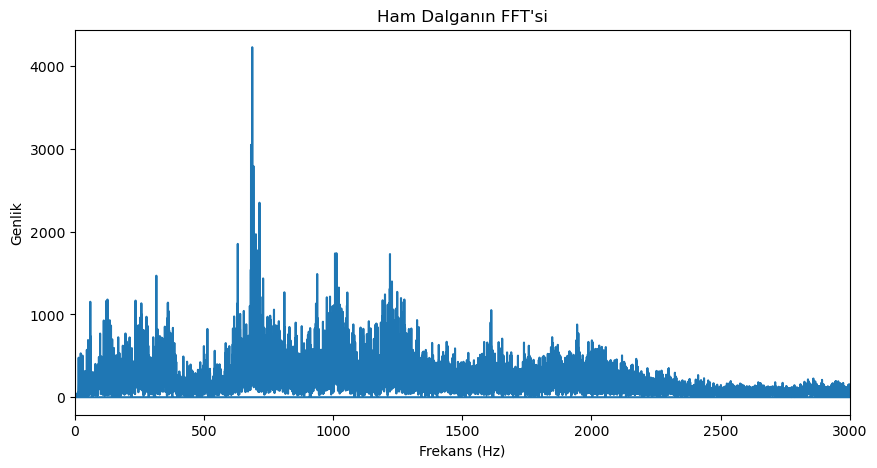

(20, 447)


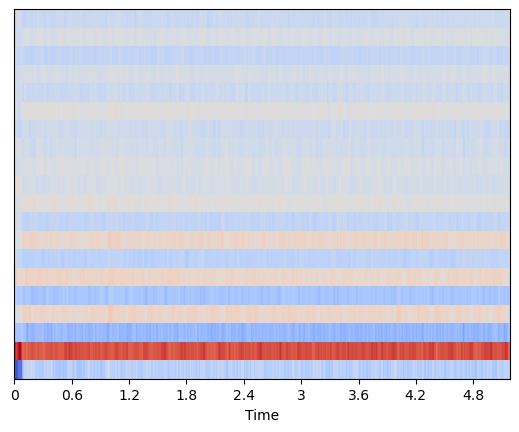

In [157]:
# Daha kısa olan ses kaydının uzunluğunu belirleyin
print(len(x2), len(x9))
min_length = min(len(x2), len(x9))

# Tüm ses kayıtlarını aynı uzunluğa kısaltın
if len(x2) > min_length:

    x2 = x2[:min_length]
else:
    x9 = x9[:min_length]

print(len(x2), len(x9))
print(sr2, sr9)
# Ses kayıtlarını birleştirin
y = x2+ x9

# if sr9 != sr2:
#     sr2 = librosa.resample(sr2, orig_sr=sr2, target_sr=sr1)
#     sr2 = sr9

# # Check if the audio files have the same length
# if len(x9) != len(x2):
#     # Adjust the length of the shorter audio file to match the length of the longer one
#     max_len = max(len(x9), len(x2))
#     x9 = np.pad(x9, (0, max_len - len(x9)))
#     x2 = np.pad(x2, (0, max_len - len(x2)))

    

# y = x9 + x2


# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr1)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr1, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()


xw2 = fft(y) 
f = np.fft.fftfreq(len(y), 1/sr1)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0, 3000])
plt.show()

# audio, sr = librosa.load(file_names[0])
# spec = librosa.feature.melspectrogram(y=audio, sr=sr)
# spec_db = librosa.power_to_db(spec, ref=np.max)
# librosa.display.specshow(spec_db, x_axis='time', y_axis='mel')

# # Gürültü tipine göre belirli frekans bileşenlerini bastırma
# # Örnek: 0-200 Hz arasındaki frekansları bastırma
# y_filtered = librosa.effects.preemphasis(y, coef=0.97)

# # Temizlenmiş sesi görselleştirme
# plt.figure(figsize=(12, 8))
# librosa.display.waveshow(y_filtered, sr=sr)
# plt.title('Cleaned Waveform')
# plt.show()

# sf.write("filtered_audio.wav", y, sr1)


mfccs = librosa.feature.mfcc(y=y, sr=sr1)
print(mfccs.shape)
librosa.display.specshow(mfccs, sr=sr1, x_axis='time')




In [109]:
sf.write('toplama.wav', y, sr3)
ipd.Audio('toplama.wav')


FİLTRE ÖZELLİKLERİ:




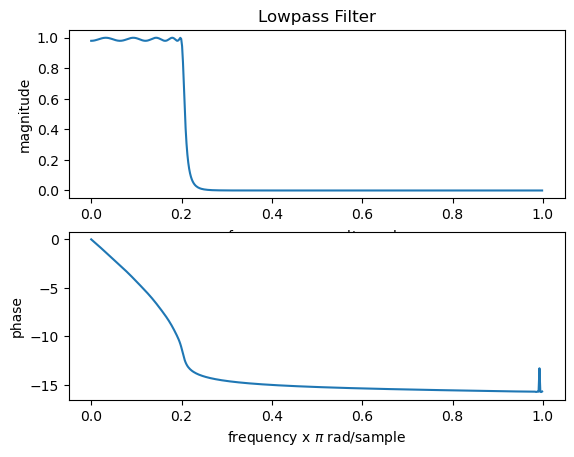

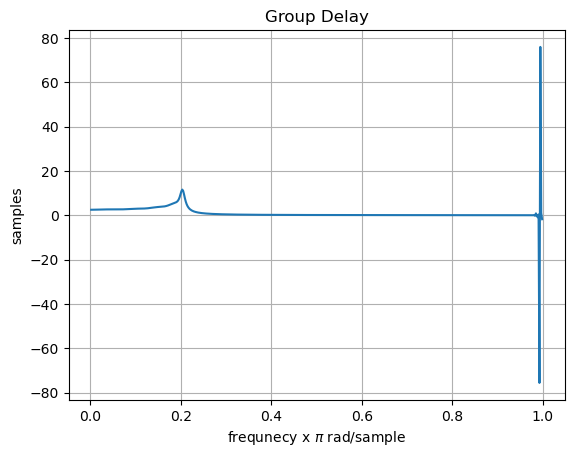

In [139]:
from scipy.io import loadmat
filter_data = loadmat('lp_cs1.mat')

Coeffs = filter_data['ba'].astype(np.float64)

N=200
b=Coeffs[:, 0].astype(float)
a=Coeffs[:, 1].astype(float)


w, Hw = sgnl.freqz(b, a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

#filtre grafikleri

plt.figure()
plt.subplot(2, 1, 1)
print('\nFİLTRE ÖZELLİKLERİ:\n\n')
plt.title('Lowpass Filter')
plt.plot(w/np.pi, Hw_mag)
plt.ylabel('magnitude')
plt.xlabel('frequency x $\pi$ rad/sample')


plt.subplot(2, 1, 2)
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency x $\pi$ rad/sample')
plt.ylabel('phase')

tau_w = -np.diff(Hw_phs)*(N/2*np.pi)

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.title('Group Delay')
plt.xlabel('frequnecy x $\pi$ rad/sample')
plt.ylabel('samples')
plt.grid()

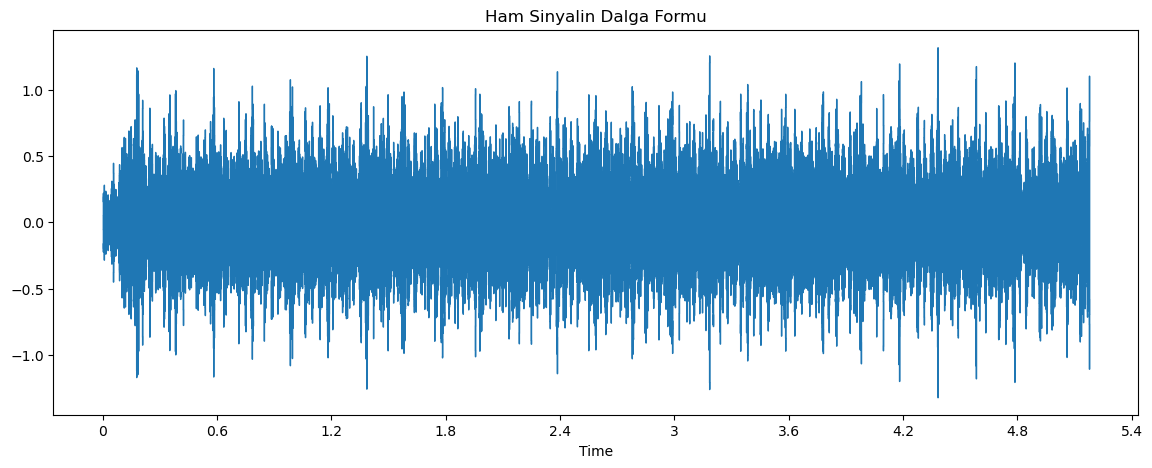

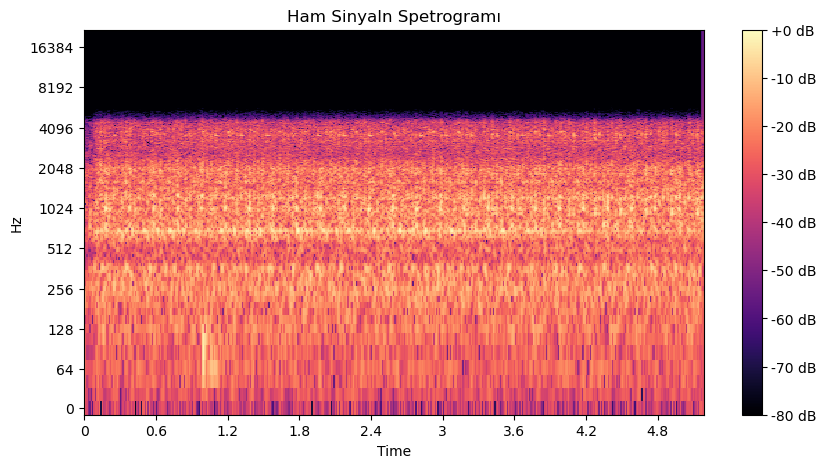

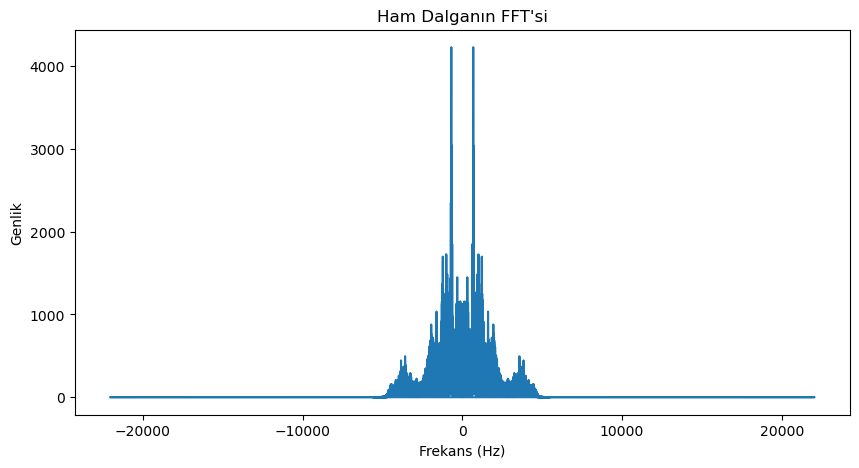

In [143]:
yn = sgnl.lfilter(b,a,y)

# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(yn, sr=sr1)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(yn)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr1, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()


xw2 = fft(yn) 
f = np.fft.fftfreq(len(yn), 1/sr1)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.show()


FİLTRE ÖZELLİKLERİ:




c:\Users\hghar\anaconda3\envs\DSP\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


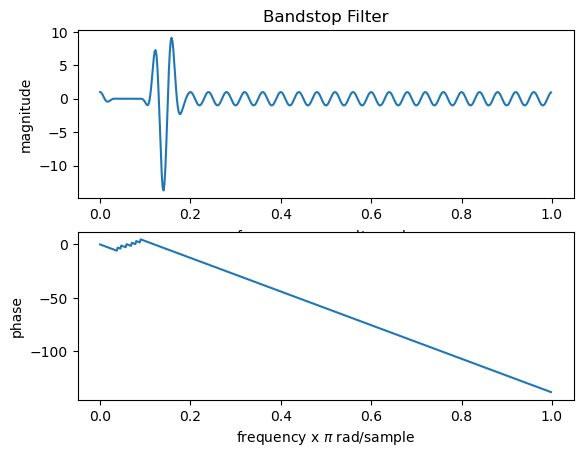

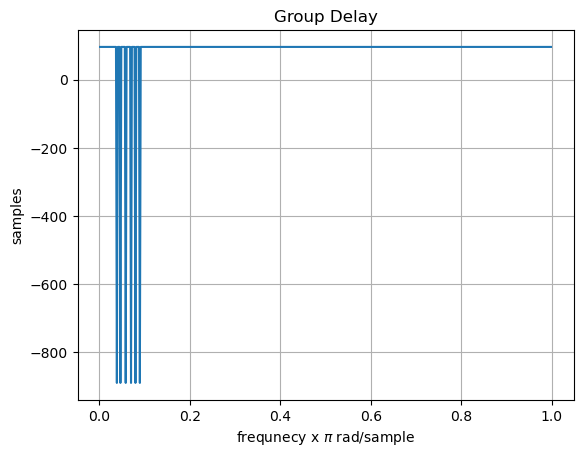

In [160]:
from scipy.io import loadmat
filter_data = loadmat('tir_bs3.mat')

Coeffs = filter_data['ba'].astype(np.float64)

N=200
b=Coeffs[:, 0].astype(float)
a=1


w, Hw = sgnl.freqz(b, a)

Hw_mag = Hw
Hw_phs = np.unwrap(np.angle(Hw))

#filtre grafikleri

plt.figure()
plt.subplot(2, 1, 1)
print('\nFİLTRE ÖZELLİKLERİ:\n\n')
plt.title('Bandstop Filter')
plt.plot(w/np.pi, Hw_mag)
plt.ylabel('magnitude')
plt.xlabel('frequency x $\pi$ rad/sample')


plt.subplot(2, 1, 2)
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency x $\pi$ rad/sample')
plt.ylabel('phase')

tau_w = -np.diff(Hw_phs)*(N/2*np.pi)

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.title('Group Delay')
plt.xlabel('frequnecy x $\pi$ rad/sample')
plt.ylabel('samples')
plt.grid()

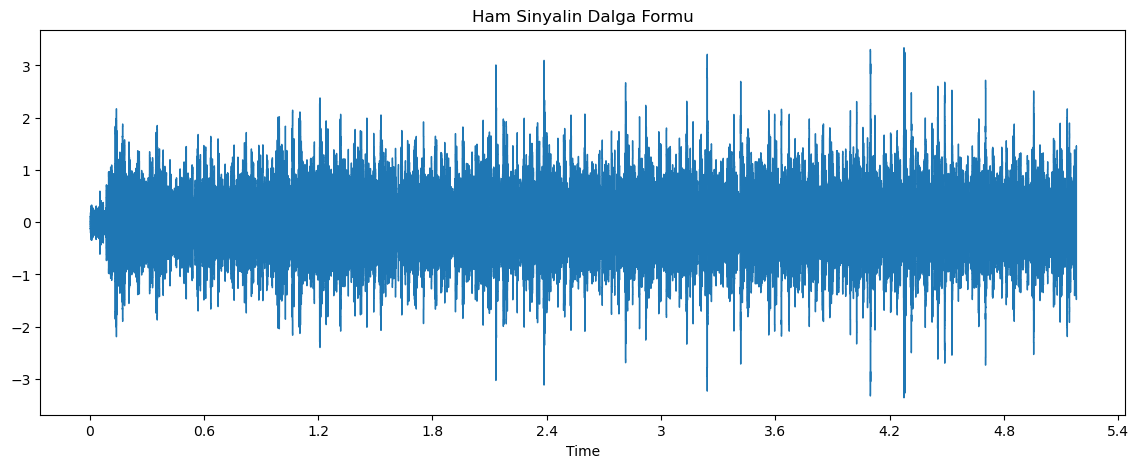

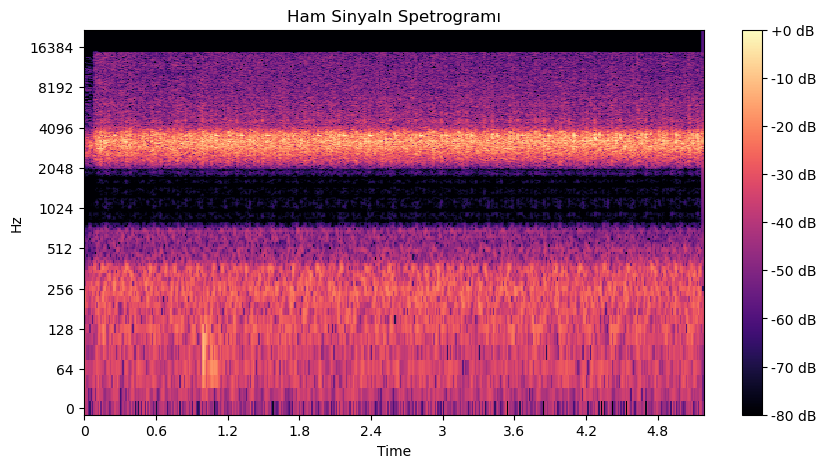

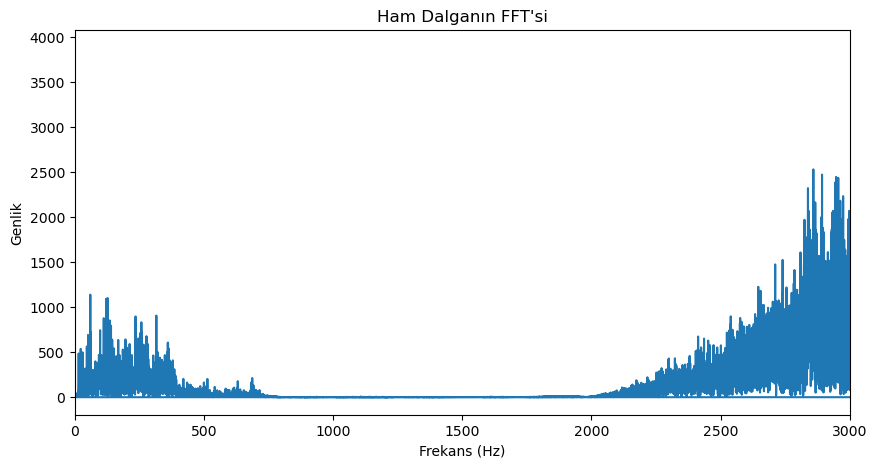

In [159]:
yn2 = sgnl.lfilter(b,a,y)

# Ses dalgaformunu görselleştirme
plt.figure(figsize=(14, 5))
librosa.display.waveshow(yn2, sr=sr1)
plt.title('Ham Sinyalin Dalga Formu')
plt.show()

# Spektrogram oluşturma
D = librosa.amplitude_to_db(abs(librosa.stft(yn2)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr1, x_axis='time', y_axis='log')
plt.title('Ham Sinyaln Spetrogramı')
plt.colorbar(format='%+2.0f dB')
plt.show()


xw2 = fft(yn2) 
f = np.fft.fftfreq(len(yn2), 1/sr1)

plt.figure(figsize=(10, 5))
plt.plot(f, np.abs(xw2))
plt.title("Ham Dalganın FFT'si")
plt.xlabel("Frekans (Hz)")
plt.ylabel("Genlik")
plt.xlim([0, 3000])
plt.show()